In [1]:
#Importing packages that I will use in my project
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [2]:
#fetch the HTML content of the web page at the given URL and create a BeautifulSoup object to parse and work with that HTML content.
response = requests.get("https://en.wikipedia.org/wiki/European_Car_of_the_Year")
soup = BeautifulSoup(response.content, 'html.parser')

ecotytable = soup.find('table', {'class': 'wikitable'})

df = pd.read_html(str(ecotytable))

# Concatenate the DataFrames into a single DataFrame ecoty - European Car Of The Year
ecoty = pd.concat(df)

# Print the resulting DataFrame
print(ecoty)

       Year                          Car  Points
0    2001.0                          NaN     NaN
1       NaN               Alfa Romeo 147   238.0
2       NaN                  Ford Mondeo   237.0
3       NaN                 Toyota Prius   229.0
4       NaN                      Audi A2   184.0
..      ...                          ...     ...
179     NaN                 Nissan Ariya   211.0
180     NaN                     Kia Niro   200.0
181     NaN              Renault Austral   163.0
182     NaN                  Peugeot 408   149.0
183     NaN  Subaru Solterra/Toyota bZ4X   133.0

[184 rows x 3 columns]


In [3]:
# Filter and delete rows starting with "20**" in column Year
ecoty= ecoty[~ecoty['Year'].astype(str).str.startswith("20")]

# Generate the numbers from 1 to 7 repeating pattern - table online shows punctation for 7 best places every year
numbers = list(range(1, 8))
places = numbers * (len(ecoty) // len(numbers)) + numbers[:len(ecoty) % len(numbers)]

# Insert the "Place" column in the DataFrame
ecoty.insert(1, "Place", places)

print(ecoty)

     Year  Place                          Car  Points
1     NaN      1               Alfa Romeo 147   238.0
2     NaN      2                  Ford Mondeo   237.0
3     NaN      3                 Toyota Prius   229.0
4     NaN      4                      Audi A2   184.0
5     NaN      5        Mercedes-Benz C-Class   164.0
..    ...    ...                          ...     ...
179   NaN      3                 Nissan Ariya   211.0
180   NaN      4                     Kia Niro   200.0
181   NaN      5              Renault Austral   163.0
182   NaN      6                  Peugeot 408   149.0
183   NaN      7  Subaru Solterra/Toyota bZ4X   133.0

[161 rows x 4 columns]


In [4]:
# Create a custom function to fill data into "Year" column as in online table every year from 2001 to 2023 there was 7 places for each year 
def fill_year(row):
    start_year = 2001
    row_index = row.name
    row['Year'] = start_year + row_index // 8
    return row

# Apply the function to fill the "Year" column
ecoty = ecoty.apply(fill_year, axis=1)

In [5]:
#Keep only 1st place in column Place
ecoty_updated = ecoty[ecoty['Place'] == 1]

In [6]:
# Reset the index in the sorted DataFrame
ecoty_updated = ecoty_updated.reset_index(drop=True)

In [7]:
#Replace word Vauxall in colun Car for Opel
ecoty_updated['Car'] = ecoty_updated['Car'].str.replace('Vauxhall', 'Opel')

In [8]:
row_to_duplicate = ecoty_updated.loc[11].copy()
row_to_duplicate['Car'] = row_to_duplicate['Car'].split('/')[-1]
ecoty_updated = ecoty_updated.append(row_to_duplicate, ignore_index=True)

In [9]:
ecoty_updated.loc[11, 'Car'] = ecoty_updated.loc[11, 'Car'].split('/')[0]

In [10]:
# Convert the "Points" column to numeric
ecoty_updated['Points'] = pd.to_numeric(ecoty_updated['Points'])
ecoty_updated['Place'] = pd.to_numeric(ecoty_updated['Place'])

In [11]:
# Rename the "Car " column to "model"
ecoty_updated.rename(columns={'Car ': 'model'}, inplace=True)

In [12]:
# Rename the "Car" column to "model"
ecoty_updated = ecoty_updated.rename(columns={'Car': 'model'})

In [13]:
# Split the "model" column to extract the brand
ecoty_updated['brand'] = ecoty_updated['model'].str.split(' ', 1).str[0]

In [14]:
ecoty_updated

,Year,Place,model,Points,brand
0,2001,1,Alfa Romeo 147,238.0,Alfa
1,2002,1,Peugeot 307,286.0,Peugeot
2,2003,1,Renault Mégane,322.0,Renault
3,2004,1,Fiat Panda,281.0,Fiat
4,2005,1,Toyota Prius,406.0,Toyota
5,2006,1,Renault Clio,256.0,Renault
6,2007,1,Ford S-Max,235.0,Ford
7,2008,1,Fiat 500,385.0,Fiat
8,2009,1,Opel Insignia,321.0,Opel
9,2010,1,Volkswagen Polo,347.0,Volkswagen


In [15]:
#export to csv file
ecoty_updated.to_csv("Car_of_the_Year.csv", index=False)

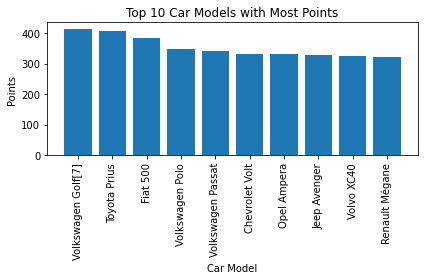

In [16]:
# Sort the DataFrame by 'Points' in descending order
ecoty_updated = ecoty_updated.sort_values('Points', ascending=False)

# Get the top 10 models with the most points
top_10_models = ecoty_updated.head(10)

# Create a bar plot to visualize the top 10 models
plt.bar(top_10_models['model'], top_10_models['Points'])
plt.xlabel('Car Model')
plt.ylabel('Points')
plt.title('Top 10 Car Models with Most Points')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

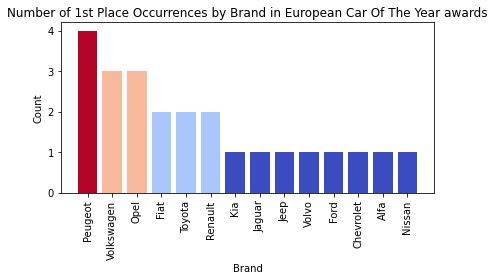

In [17]:
# Create a colormap with a gradient of colors
cmap = plt.cm.get_cmap('coolwarm')

# Count the occurrences of each brand in the first place
brand_counts = ecoty_updated[ecoty_updated['Place'] == 1]['brand'].value_counts()


# Normalize the counts to a range between 0 and 1
normalized_counts = (brand_counts.values - brand_counts.values.min()) / (brand_counts.values.max() - brand_counts.values.min())

# Create a bar plot with the gradient color effect
plt.bar(brand_counts.index, brand_counts.values, color=cmap(normalized_counts))

# Set the x-axis label, y-axis label, and plot title
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of 1st Place Occurrences by Brand in European Car Of The Year awards')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
#Installing opendatasets from Kaggle
!pip install opendatasets

In [19]:
#Importing opendatasets as od
import opendatasets as od

#Downloading First Dataset - All Airports across the world from Kaggle using API and creating Token/downloadingle with username and Kaggle Key information
od.download(
	"https://www.kaggle.com/datasets/wspirat/poland-used-cars-offers")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: danielmiku
Your Kaggle Key: ········


  0%|          | 0.00/1.27M [00:00<?, ?B/s]

100%|██████████| 1.27M/1.27M [00:00<00:00, 3.66MB/s]

In [20]:
#assigning data.csv file downloaded from Kaggle as used_cars
used_cars =('poland-used-cars-offers/\
data.csv')

#using pandas assigning cars to read csv file
cars = pd.read_csv(used_cars)

In [21]:
#reading first rows of dataframe cars
cars.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


In [22]:
#information about the "cars" DataFrame
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   mileage          91523 non-null  object 
 4   gearbox          91523 non-null  object 
 5   engine_capacity  91523 non-null  object 
 6   fuel_type        91523 non-null  object 
 7   city             91523 non-null  object 
 8   voivodeship      91523 non-null  object 
 9   year             91523 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.0+ MB


In [23]:
#count the number of missing values (NaN)
cars.isna().sum()

brand              0
model              0
price_in_pln       0
mileage            0
gearbox            0
engine_capacity    0
fuel_type          0
city               0
voivodeship        0
year               0
dtype: int64

In [24]:
#Calculate the number of unique values in each column
cars.nunique()

brand                 43
model              18641
price_in_pln        8289
mileage            14154
gearbox                2
engine_capacity      640
fuel_type           1267
city                4392
voivodeship           26
year                 349
dtype: int64

In [25]:
#Cleaning year structure using string matches method to checking for word boundaries that are not starting with 19 followed by two digits or 20 followed by 2 digits
#Assigning structures that not meeting criteria to mask
mask=cars["year"].str.match(r'\b(?!(19\d{2}|20\d{2}))')==True
#removing rows - with specified element that was assigned as mask without returning new dataframe
cars.drop(cars[mask].index,inplace=True)
#converting values in year column to integers
cars["year"]=cars["year"].astype(int)
#retrivig shape of cars DataFrame number of rows and columns
cars.shape

(86274, 10)

In [26]:
#Cleaning "mileage" column structure by creating mask that is True for rows where the "mileage" value does not end with "km" and False for rows where it does end with "km"
mask=~(cars["mileage"].str.contains(r'km$'))
#Removing rows by using drop from database where the mask is True. So where there is no values ending with "km"
cars.drop(cars[mask].index,inplace=True)
#Using str.replace twice to remove characters 'km' and spaces from "mileage" column
cars["mileage"]=cars["mileage"].str.replace('km','').str.replace(' ','')
#converting values in "mileage" column to integers by using astype
cars["mileage"]=cars["mileage"].astype(int)
#retrivig shape of cleaned DataFrame number of rows and columns
cars.shape

(86109, 10)

In [27]:
#Cleaning "engine_capacity" column structure by creating mask that is True for rows where the "engine_capacity" value does not end with "cm3" and False for rows where it does end with "cm3"
mask=~(cars["engine_capacity"].str.contains(r'cm3$'))
#Removing rows by using drop from database where the mask is True. So where there is no values ending with "cm3"
cars.drop(cars[mask].index,inplace=True)
#Using str.replace twice to remove characters 'cm3' and spaces from "mileage" column
cars["engine_capacity"]=cars["engine_capacity"].str.replace('cm3','').str.replace(' ','')
#converting values in "mileage" column to integers by using astype
cars["engine_capacity"]=cars["engine_capacity"].astype(int)
#retrivig shape of cleaned DataFrame number of rows and columns
cars.shape

(85677, 10)

In [28]:
#Deleting rows that contain duplicates except for the first occurrence
cars.drop_duplicates(keep="first", inplace=True)

In [29]:
#assigning new name to dataframe
used_cars_pl = cars
used_cars_pl

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133760,manual,1970,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133760,manual,1970,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227000,manual,1970,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227000,manual,1970,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239000,manual,1995,Benzyna+LPG,Pabianice,Łódzkie,1995
...,...,...,...,...,...,...,...,...,...,...
91518,volvo,Volvo XC 90,379900.0,1024,automatic,1969,Hybryda,Szczecin,Zachodniopomorskie,2022
91519,volvo,Volvo XC 90 T6 AWD Inscription 7os,246000.0,1024,automatic,1969,Hybryda,Siedlce,Mazowieckie,2022
91520,volvo,Volvo V60 T4 R-Design,159900.0,8847,automatic,1969,Benzyna,Pyrzowice,Śląskie,2020
91521,volvo,Volvo XC 40 T5 AWD Momentum Pro,146000.0,8847,automatic,1969,Benzyna,Żmigród,Dolnośląskie,2020


In [30]:
#Generating descriptive statistics for each column and Transpose - create a reflection of the making rows as columns and vice versa
used_cars_pl.describe().T

,count,mean,std,min,25%,50%,75%,max
price_in_pln,77688.0,79190.416770,99643.204063,1111.0,26500.0,49900.0,94000.0,2599000.0
mileage,77688.0,141501.132865,93051.729015,1.0,67000.0,141940.0,204688.0,730000.0
engine_capacity,77688.0,1864.503372,750.040232,1.0,1461.0,1686.0,1995.0,8300.0
year,77688.0,2014.186502,5.795002,1995.0,2010.0,2015.0,2019.0,2023.0


In [31]:
#exporting dataframe to csv file
used_cars_pl.to_csv("used_cars_pl.csv", index=False)

In [32]:
# Extract the first three words from the 'model' column in both DataFrames
used_cars_pl['model_key'] = used_cars_pl['model'].str.split().str[:3].str.join(' ')
ecoty_updated['model_key'] = ecoty_updated['model'].str.split().str[:3].str.join(' ')

# Merge the DataFrames based on the 'model_key' column
merged_df = pd.merge(used_cars_pl, ecoty_updated, on='model_key', how='left')

# Remove the 'model_key' column
merged_df = merged_df.drop('model_key', axis=1)

# Print the merged DataFrame
print(merged_df)

          brand_x                             model_x  price_in_pln  mileage  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   133760   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   133760   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   227000   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   227000   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   239000   
...           ...                                 ...           ...      ...   
77683       volvo                         Volvo XC 90      379900.0     1024   
77684       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0     1024   
77685       volvo               Volvo V60 T4 R-Design      159900.0     8847   
77686       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0     8847   
77687       volvo          Volvo XC 40 T3 Inscription      108900.0    34000   

         gearbox  engine_capacity    fu

In [33]:
#export merged file to csv
merged_df.to_csv("merged_df.csv", index=False)

In [34]:
#cleaning up dataframe by droping columns
df = merged_df.drop(['Place', 'Points', 'model_y', 'brand_y'], axis=1)

In [35]:
#cleaning up dataframe by renaming columns
df = df.rename(columns={'Year': 'Car Of The Year', 'brand_x' : 'brand', 'model_x' : 'model'})

In [36]:
#cleaning up dataframe by replacing multiple names for Alfa Romeo 147 in model column
df['model'] = df['model'].str.replace(r'^Alfa Romeo 147(.*)', 'Alfa Romeo 147', regex=True)

In [37]:
print(df)

            brand                               model  price_in_pln  mileage  \
0      alfa-romeo     Alfa Romeo Spider 2.0-16 TSpark       14700.0   133760   
1      alfa-romeo       Alfa Romeo GTV 2.0 16v TSpark       14000.0   133760   
2      alfa-romeo     Alfa Romeo 164 2.0 TSpark Super        4500.0   227000   
3      alfa-romeo        Alfa Romeo Spider 2.0 TSpark       17100.0   227000   
4      alfa-romeo       Alfa Romeo 156 1.6 TSpark 16v        3900.0   239000   
...           ...                                 ...           ...      ...   
77683       volvo                         Volvo XC 90      379900.0     1024   
77684       volvo  Volvo XC 90 T6 AWD Inscription 7os      246000.0     1024   
77685       volvo               Volvo V60 T4 R-Design      159900.0     8847   
77686       volvo     Volvo XC 40 T5 AWD Momentum Pro      146000.0     8847   
77687       volvo          Volvo XC 40 T3 Inscription      108900.0    34000   

         gearbox  engine_capacity    fu

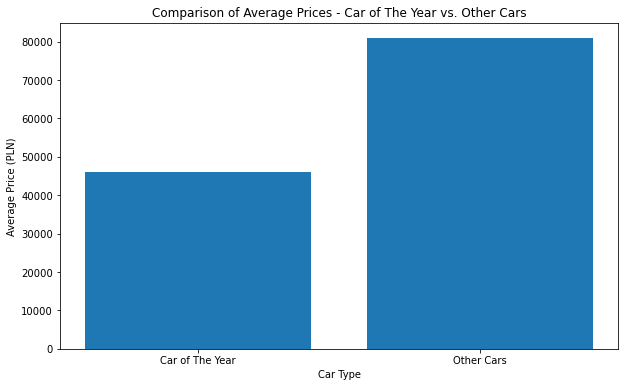

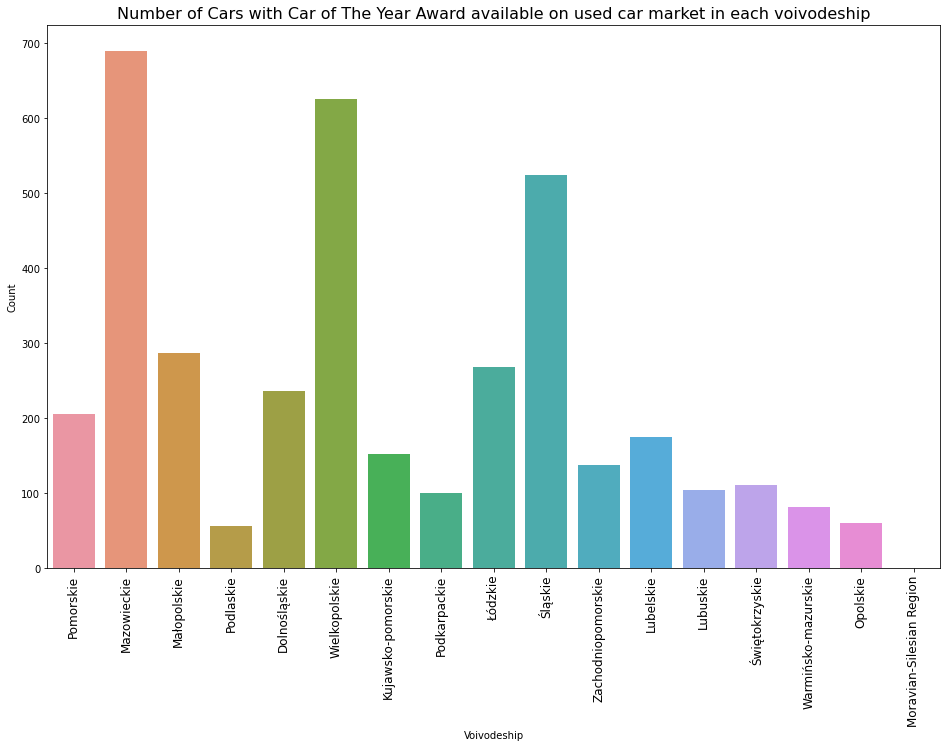

In [38]:
# Filter the cars awarded Car of The Year
coty_cars = df[df['Car Of The Year'].notna()]

# Calculate average prices for Car of The Year and other cars
coty_avg_price = coty_cars['price_in_pln'].mean()
non_coty_avg_price = df[df['Car Of The Year'].isna()]['price_in_pln'].mean()

# Create the bar chart for average prices
plt.figure(figsize=(10, 6))
plt.bar(['Car of The Year', 'Other Cars'], [coty_avg_price, non_coty_avg_price])
plt.xlabel('Car Type')
plt.ylabel('Average Price (PLN)')
plt.title('Comparison of Average Prices - Car of The Year vs. Other Cars')

# Create the count plot for cars awarded Car of The Year in each voivodeship
plt.figure(figsize=(16, 10))
sns.countplot(x='voivodeship', data=coty_cars)
plt.xticks(rotation=90, fontsize=12)
plt.title("Number of Cars with Car of The Year Award available on used car market in each voivodeship", fontsize=16)
plt.xlabel('Voivodeship')
plt.ylabel('Count')

# Show the plots
plt.show()

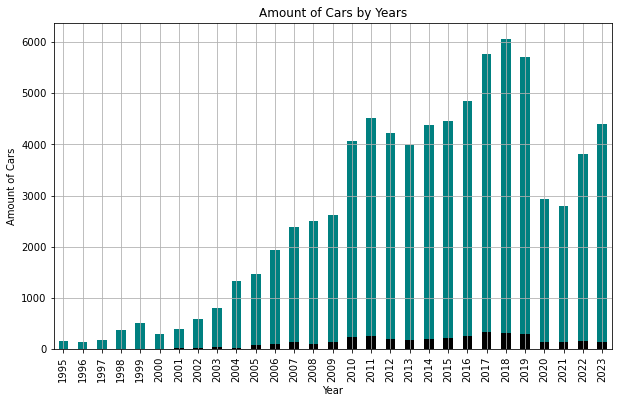

In [39]:
# Group and count the number of cars by year from used_cars_pl DataFrame
used_cars_counts = used_cars_pl.groupby('year').count()['model']

# Create the bar chart for the number of cars by year
ax = used_cars_counts.plot(kind='bar', grid=True, color='teal', figsize=(10, 6))

# Overlay the data from coty_cars DataFrame
coty_counts = coty_cars.groupby('year').count()['model']
coty_counts.plot(kind='bar', grid=True, color='black', ax=ax, alpha=1)

# Set the x-axis and y-axis labels and the chart title
plt.xlabel('Year')
plt.ylabel('Amount of Cars')
plt.title('Amount of Cars by Years')

# Show the chart
plt.show()

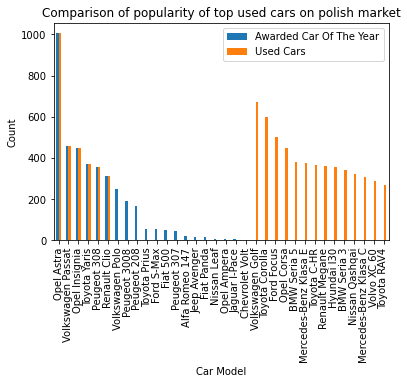

In [40]:
# Assuming you have two DataFrames named 'df' and 'used_cars_pl', both with a column 'model'

# Get the top 20 most common cars in each DataFrame
top_20_df = coty_cars['model'].value_counts().nlargest(20)
top_20_used_cars_pl = used_cars_pl['model'].value_counts().nlargest(20)

# Combine the top 20 cars from both DataFrames
combined_top_20 = pd.concat([top_20_df, top_20_used_cars_pl], axis=1)
combined_top_20.columns = ['Awarded Car Of The Year', 'Used Cars']

# Create the comparison bar chart
combined_top_20.plot(kind='bar')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.title('Comparison of popularity of top used cars on polish market')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()